In [1]:
import pandas as pd
import numpy as np
import re
import sys
import string
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.it.stop_words import STOP_WORDS as it_stop
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from top2vec import Top2Vec

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\etien\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\etien\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# too much data in certain articles
df = pd.read_csv("donnees-textes_v3.csv", error_bad_lines=False, engine="python")
docs = list(df.loc[:, "Texte"].values)

C:\Users\etien\AppData\Local\Temp\ipykernel_7824\1061044484.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("donnees-textes_v3.csv", error_bad_lines=False, engine="python")
Skipping line 5: field larger than field limit (131072)
Skipping line 14: field larger than field limit (131072)
Skipping line 21: field larger than field limit (131072)
Skipping line 33: field larger than field limit (131072)
Skipping line 35: field larger than field limit (131072)
Skipping line 41: field larger than field limit (131072)
Skipping line 43: field larger than field limit (131072)
Skipping line 63: field larger than field limit (131072)
Skipping line 77: field larger than field limit (131072)
Skipping line 79: field larger than field limit (131072)
Skipping line 83: field larger than field limit (131072)
Skipping line 84: field larger than field limit (131072)
Skipping line 103: field lar

In [4]:
stopWords_more = ['«', '»', "”", "“", '[', ']']
stopWords = list(fr_stop) + list(en_stop) + list(it_stop) +stopWords_more
exclude = set(string.punctuation)
lemma = nltk.stem.WordNetLemmatizer()


def clean(corpusfr):
    nonum_free = re.sub(r'\d+', '', corpusfr)
    punc_free = "".join(p for p in nonum_free if p not in exclude)
    doublespace_free = re.sub('\s+', ' ', punc_free).strip()
    stop_free = " ".join([i for i in doublespace_free.split() if i not in stopWords])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())

    return normalized

In [5]:
# option to do per document
documents = []
for doc in docs:
    documents.append(clean(str(doc)))

# split per sentence
sentences = []
sentences_clean = []
for doc in docs:
    try:
        sentences += doc.split(".")
    except:
        print(f"sentence {doc} skipped")

for sentence in sentences:
    sentences_clean.append(clean(sentence))

sentence nan skipped
sentence nan skipped


In [6]:
model = Top2Vec(documents=sentences_clean, embedding_model='distiluse-base-multilingual-cased')

2022-05-16 10:05:21,256 - top2vec - INFO - Pre-processing documents for training
c:\users\etien\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-05-16 10:05:26,607 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/607 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

2022-05-16 10:10:38,901 - top2vec - INFO - Creating joint document/word embedding
2022-05-16 10:47:24,938 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-16 10:49:48,411 - top2vec - INFO - Finding dense areas of documents
2022-05-16 10:50:02,180 - top2vec - INFO - Finding topics


In [100]:
#number of topics
len(pd.DataFrame(model.get_topic_sizes()).columns)-1

973

In [25]:
#create file with the list of topics
topic_words, word_scores, topic_nums = model.get_topics()
sys.stdout = open("topics.txt", "w", encoding="utf-8")
for word, score, num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f"Words: {word}")

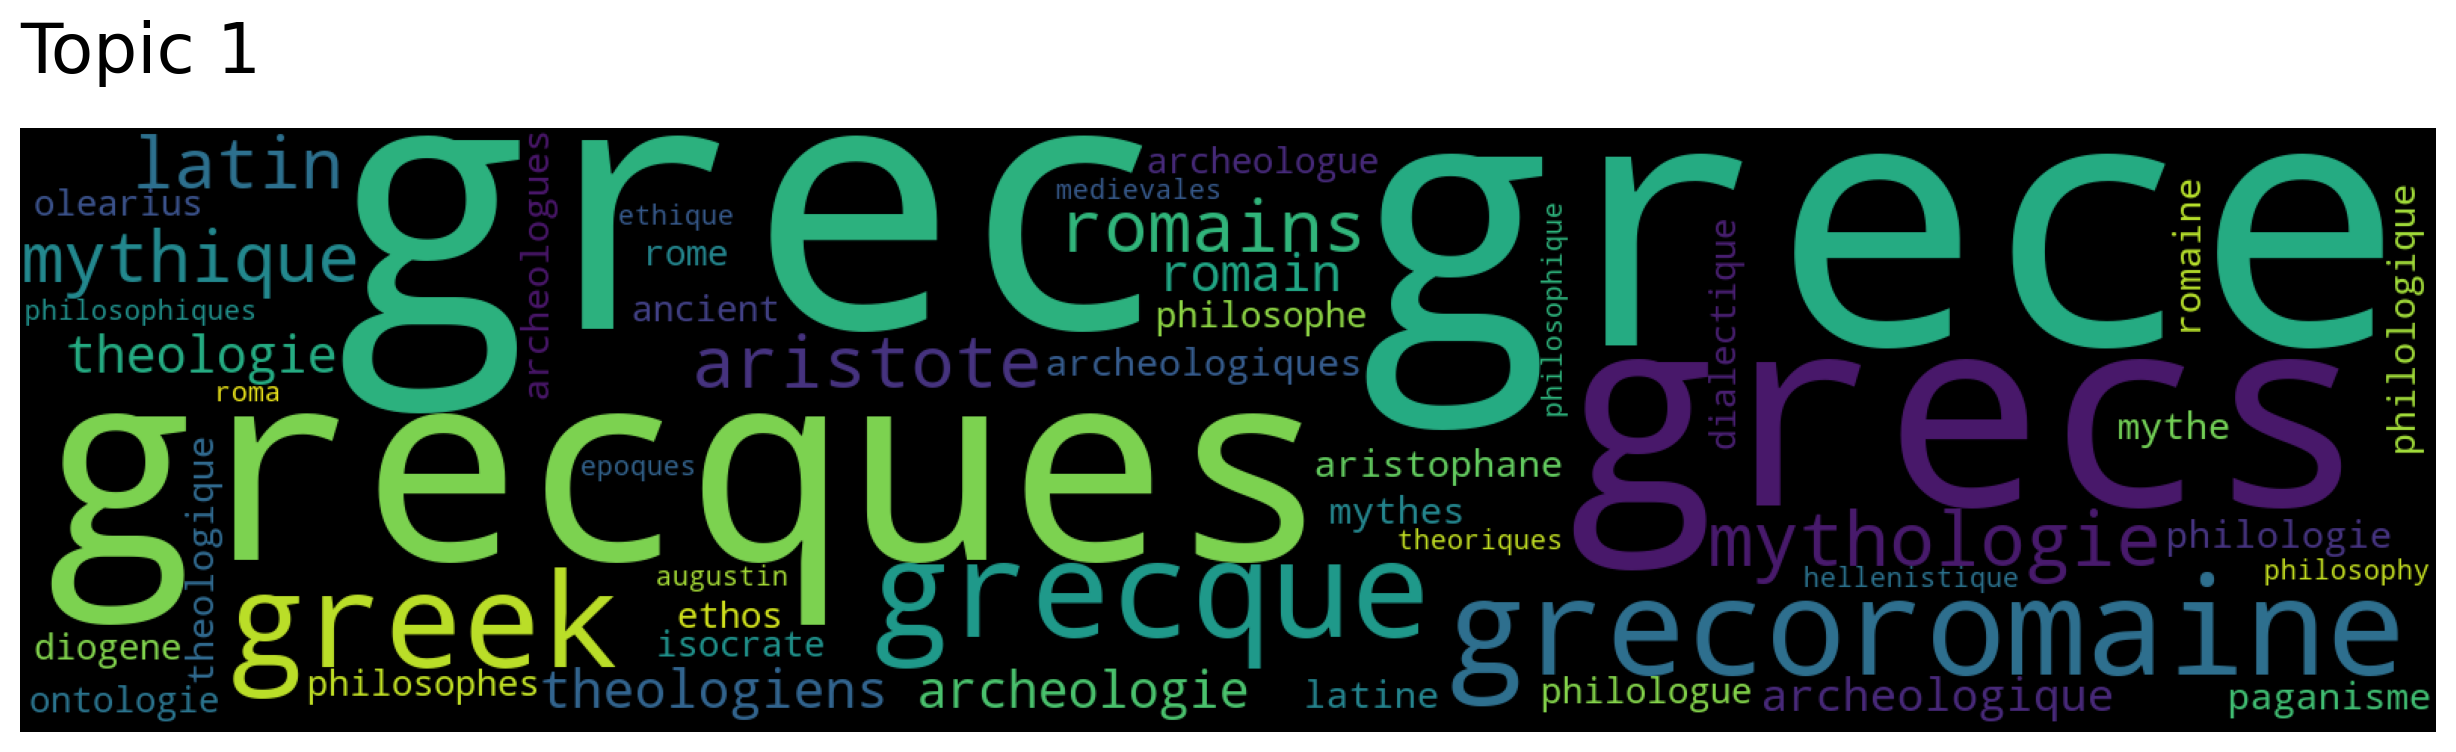

In [45]:
model.generate_topic_wordcloud(1)

In [104]:
#search for 10 topics most similar to the keyword "grec"
#word_scores: For each topic the cosine similarity scores of the top 50 words to the topic
#topic_score: For each topic the cosine similarity to the search keyword 'grec'
pd.DataFrame(model.search_topics(keywords=["grec"], num_topics=10), index=['topic', 'word_scores', 'topic_score','topic_nums'])

,0,1,2,3,4,5,6,7,8,9
topic,"[grec, grece, grecques, grecs, grecoromaine, g...","[etoile, epoques, audessus, etatsunis, epoque,...","[paris, vise, dogen, pune, vies, kant, ville, ...","[chretiens, chretien, cles, crespin, chretienn...","[bnf, fr, des, dei, del, tel, livresque, ait, ...","[jade, jones, jean, johannes, juan, veda, gylo...","[trad, traduction, traductions, traduire, sign...","[mot, vise, depit, fourni, entite, uruk, estce...","[classe, class, genre, classiques, classique, ...","[httpsapi, atheniens, eveil, anuuballit, inca,..."
word_scores,"[0.6415155, 0.63286686, 0.60481215, 0.6036438,...","[0.9416244, 0.92726576, 0.9240743, 0.91915834,...","[0.9999638, 0.88454884, 0.88182926, 0.87983745...","[0.9428962, 0.93933403, 0.90505165, 0.8946006,...","[0.8630415, 0.8433271, 0.8392081, 0.83795214, ...","[0.95894814, 0.9371769, 0.9352615, 0.9299993, ...","[0.99995774, 0.86997163, 0.8442609, 0.8427005,...","[0.9746429, 0.9692877, 0.9657942, 0.96414566, ...","[0.9019997, 0.87574184, 0.8657237, 0.8629706, ...","[0.99482006, 0.80792236, 0.7957526, 0.78418046..."
topic_score,0.641515,0.617376,0.554013,0.550608,0.550541,0.522327,0.521943,0.511424,0.507232,0.495693
topic_nums,1,47,387,136,646,127,90,0,899,815


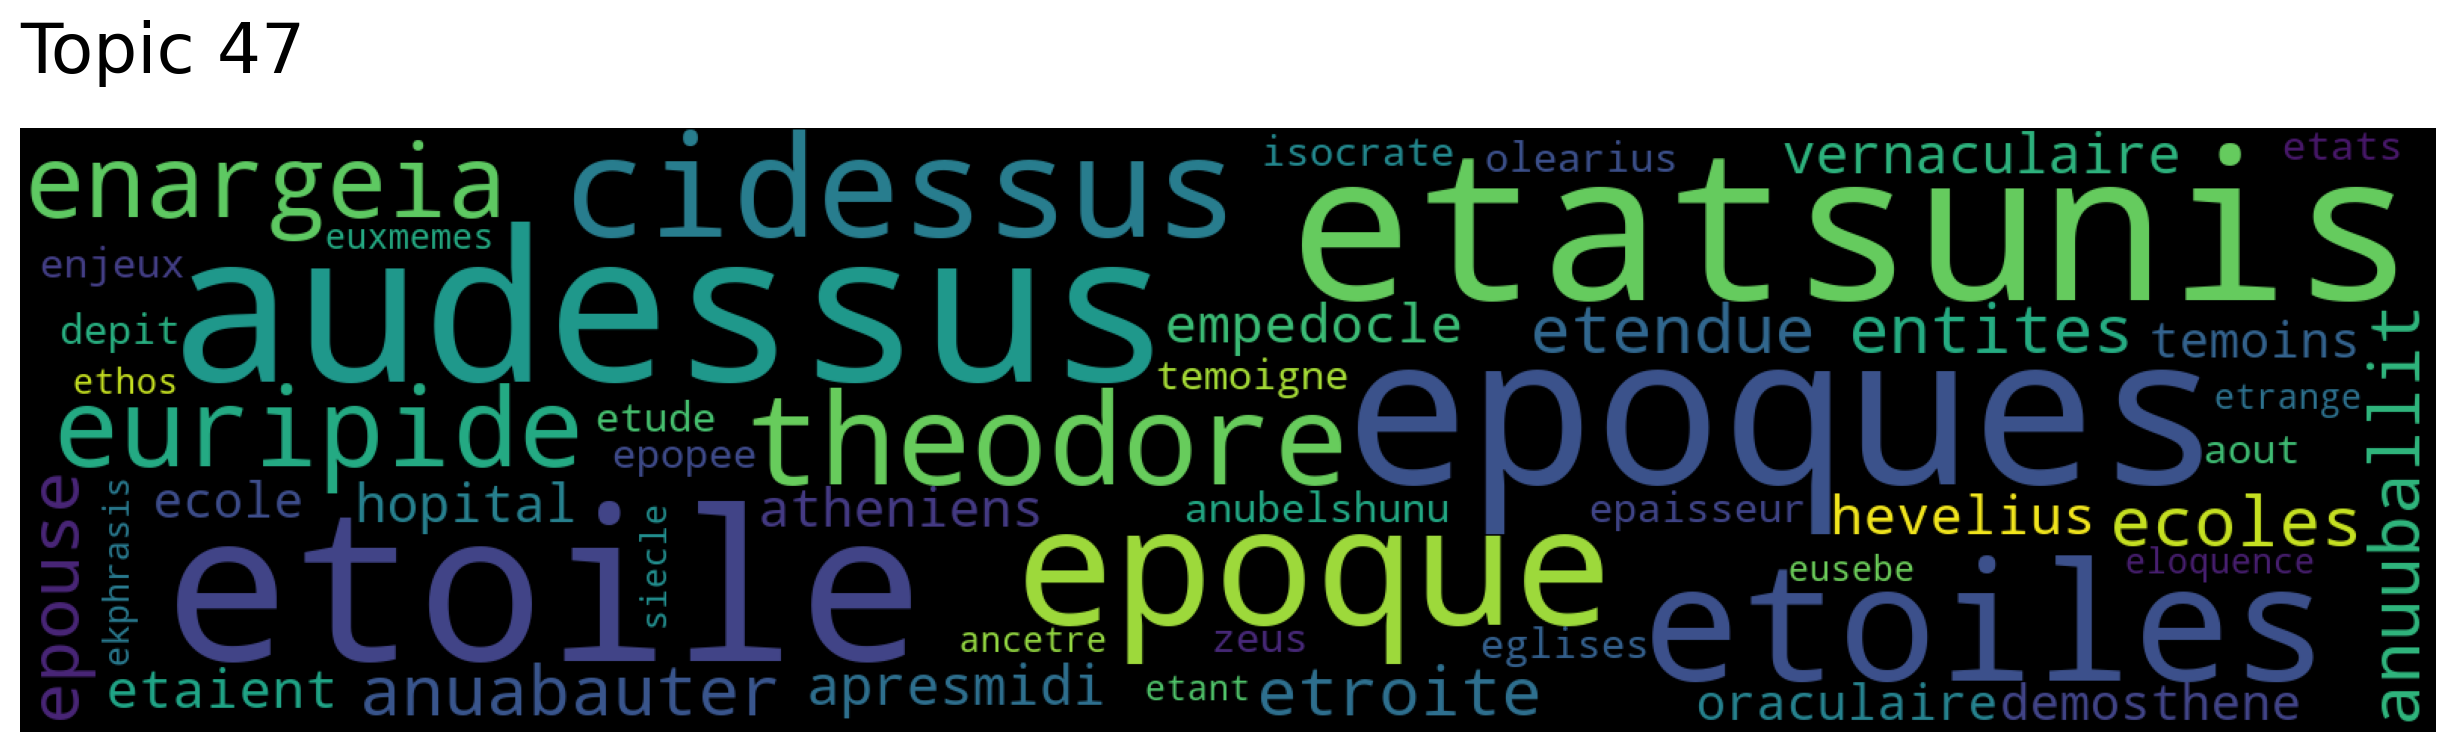

In [2]:
model.generate_topic_wordcloud(47)

In [3]:
#sentences similar in the cluster topic and their score
pd.DataFrame(model.search_documents_by_topic(topic_num=47, num_docs=20), index=['sentence','score','sentence_number'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sentence,Euthyd,Themis,Isocrate,Isocrate,Herennium,Herennium,Thucydide II,Thucydide II,cidessous,cidessous,Andriotis s,Andriotis s,epic,Humphrey J,Humphrey J,Xénophane,Mynors,Mynors,Mynors,Mynors
score,0.800283,0.798174,0.779523,0.779523,0.76133,0.76133,0.755765,0.755765,0.743123,0.743123,0.726603,0.726603,0.703146,0.687923,0.687922,0.683304,0.678813,0.678813,0.678813,0.678813
sentence_number,63628,70030,97632,97925,24717,24251,48216,48453,35847,36078,123033,122651,101645,35293,35510,9381,108424,108443,108639,108650


In [109]:
#search keywords for content semantically similar to "grec" and "philosophe"
pd.DataFrame(model.search_documents_by_keywords(keywords=["grec","philosophe"], num_docs=30), index=['keyword','score','sentence_number'])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
keyword,Mythologiques,La Grèce mythe,Mythe pensée Grecs,Aristot,Aristot,Greek Poetry and Philosophy,Greek Poetry and Philosophy,Greek Poetry and Philosophy,Le Monde grec p,Isocrate,...,Andriotis s,Andriotis s,bilingue grec français G,Mythologiques I Paris,Phil,Philosophie présent,Philosophie présent,Philosophie présent,Philosophie présent,Philosophie présent
score,0.677202,0.660432,0.639084,0.634313,0.634313,0.628627,0.628627,0.628627,0.628128,0.627797,...,0.597997,0.597997,0.5936,0.589174,0.582163,0.580613,0.580613,0.580613,0.580613,0.580613
sentence_number,22571,23038,16478,16727,17087,34441,47409,44463,22083,97925,...,122651,123033,108857,101464,16245,95176,95193,95190,95186,95200


In [84]:
#search for similar words to "grec"
pd.DataFrame(model.similar_words(keywords=["grec"], keywords_neg=[], num_words=20), index=['keyword','score'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
keyword,grece,grecque,grecques,grecs,greek,grecoromaine,rome,latine,latin,romaine,roma,romains,olearius,arabes,romain,italien,epoques,augustin,arabe,egypte
score,0.994914,0.984101,0.977654,0.972862,0.929139,0.896289,0.714835,0.695929,0.692016,0.679292,0.67389,0.671666,0.660162,0.65951,0.655215,0.646722,0.640467,0.639773,0.630671,0.626878


In [4]:
#save the session
import dill
dill.dump_session('notebook_env.db')

In [1]:
#load the session
import dill
dill.load_session('notebook_env.db')